Exploring the data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os
import sys
import importlib
import functions as aux_fun
importlib.reload(aux_fun)
from datetime import datetime as dti

Reading data

In [20]:
# Ler os dados ja tratados

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)

user_offer_df = pd.read_csv('user_offer.csv').drop(columns='Unnamed: 0')

# Ler os maps
map_portifolio = json.load(open('mapper_id/portifolio_ids.json'))
map_profile = json.load(open('mapper_id/profile_ids.json'))



In [19]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [21]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


Preparing the profile and portifolio datasets to analysis.  

It is necessary create a column for int id

In [22]:
# Profile
profile['user_id'] = profile.id.map(map_profile)

# Portifolio
portfolio['offer_id'] = portfolio.id.map(map_portifolio)

Preparing the dataset  

For more demographic information, merge the user offer dataset with profile dataset

In [31]:
# Merge the user_offer_df and profile

user_prof_offer_df = user_offer_df.merge(profile, on='user_id').drop(columns='id')
user_prof_offer_df

,offer_id_rec,viewed_rate,completed_rate,tra_offer_infl,valid_view_rate,completed_after_view_rate,reward_won,offer_reward,offer_difficulty,offer_type,user_id,gender,age,became_member_on,income
0,7.0,1.0,0.0,49.0,1.0,NaN,0.0,0.0,0.0,informational,3,F,75,20170509,100000.0
1,3.0,1.0,1.0,37.0,1.0,1.0,5.0,5.0,5.0,bogo,3,F,75,20170509,100000.0
2,0.0,1.0,1.0,48.0,1.0,1.0,10.0,10.0,10.0,bogo,3,F,75,20170509,100000.0
3,8.0,1.0,1.0,0.0,1.0,0.0,5.0,5.0,5.0,bogo,3,F,75,20170509,100000.0
4,4.0,1.0,0.0,1.0,1.0,NaN,0.0,5.0,20.0,discount,4,None,118,20170804,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63141,5.0,1.0,1.0,32.0,1.0,1.0,3.0,3.0,7.0,discount,5776,M,76,20160405,76000.0
63142,2.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,informational,5776,M,76,20160405,76000.0
63143,1.0,0.0,1.0,0.0,NaN,0.0,10.0,10.0,10.0,bogo,5776,M,76,20160405,76000.0
63144,8.0,1.0,1.0,0.0,1.0,0.0,5.0,5.0,5.0,bogo,5776,M,76,20160405,76000.0


#### Exploring the data

Questions  

1. Número de ofertas distribuídas
2. Número de tipo de ofertas distribuídas
3. Taxa de visuailização por idade, income, tempo de casa e sexo
4. Taxa transações influenciadas pela oferta pelos mesmo campos

<AxesSubplot:xlabel='offer_difficulty'>

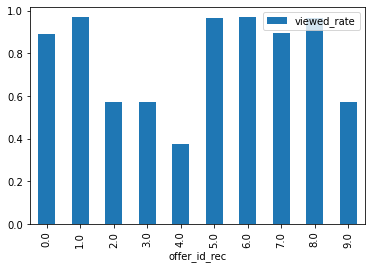

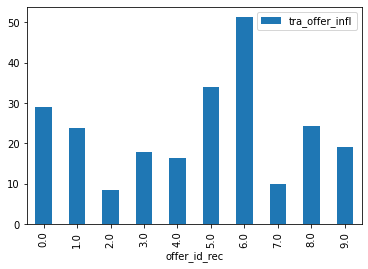

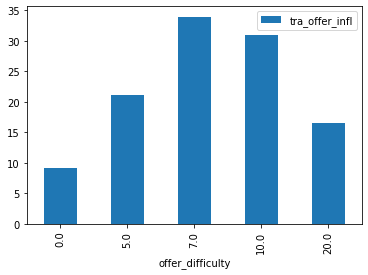

In [54]:
user_prof_offer_df.groupby('offer_id_rec')[['viewed_rate']].mean().plot.bar()
user_prof_offer_df.groupby('offer_id_rec')[['tra_offer_infl']].mean().plot.bar()
user_prof_offer_df.groupby('offer_difficulty')[['tra_offer_infl']].mean().plot.bar()